In [1]:
# more_data_num_epochs
# Plot graphs to illustrate the performance of MNIST with an increasing number of epochs

import time
import json
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

sys.path.append('../src/')
import mnist_loader
import network

In [2]:
EPOCHS = [10, 20, 50, 100, 200, 500, 1000] 
start = time.time()

In [9]:
def main():
    run_networks()
    make_plots()
    
    end = time.time()
    print(end - start)

    import winsound
    duration = 1000  # milliseconds
    freq = 440  # Hz
    winsound.Beep(freq, duration)
                       
def run_networks():
    random.seed(12345678)
    np.random.seed(12345678)
    training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
    net = network.Network([784, 30, 10], cost=network.CrossEntropyCost())
    accuracies = []
    for epochs in EPOCHS:
        print("\n\nTraining network with different number of epochs %s" % epochs)
        net.large_weight_initializer()
        num_epochs = epochs 
        net.SGD(training_data[:1000], num_epochs, 10, 1.0)
        accuracy = net.accuracy(validation_data) / 100.0
        print("Accuracy was %s percent" % accuracy)
        accuracies.append(accuracy)
    f = open("more_data_epochs3.json", "w")
    json.dump(accuracies, f)
    f.close()

def make_plots():
    f = open("more_data_epochs3.json", "r") 
    accuracies = json.load(f)
    f.close()

    make_linear_plot(accuracies)
    make_log_plot(accuracies)

def make_linear_plot(accuracies):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(EPOCHS, accuracies, color='#37b767',
            linewidth=2)
    ax.plot(EPOCHS, accuracies, "o", color='#FF338D')
    ax.set_xlim(10, 1000)
    ax.set_ylim(70, 100)
    ax.grid(True, linestyle='--')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Classification accuracy (%)')
    ax.set_title('Accuracy on the validation data')
    plt.show()
    fig.savefig('Project/images/epoNum_var_linear_reg_valid.jpeg')


def make_log_plot(accuracies):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(EPOCHS, accuracies, color='#37b767',
            linewidth=2)
    ax.plot(EPOCHS, accuracies, "o", color='#FF338D')
    ax.set_xlim(10, 1000)
    ax.set_ylim(70, 100)
    ax.set_xscale('log')
    ax.grid(True, linestyle='--')
    ax.set_xlabel('Epochs scaled')
    ax.set_ylabel('Classification accuracy (%)')
    ax.set_title('Accuracy on validation data')
    plt.show()
    fig.savefig('Project/images/epoNum_var_log_reg_valid.jpeg')

    
if __name__ == "__main__":
    main()

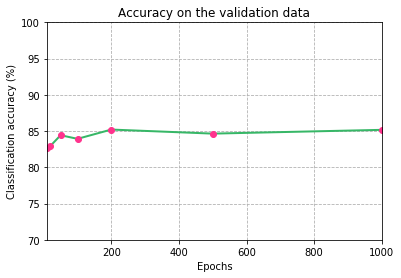

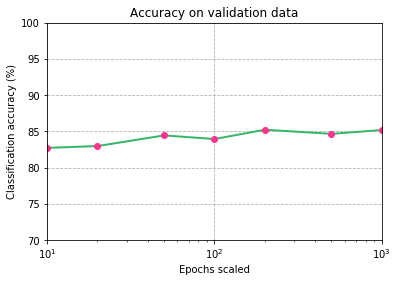